# Steps 
1- Import all libraries 
2- Get data directory 
3- Load all the data 
4- Select the damged and undamaged column 
5- Concatenate the whole damaged files alone and and the whole undamaged files alone. 
6- 

In [1]:
import scipy.io
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.utils.data
from utils import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
print(os.getcwd())

C:\Users\Mohamed Ragab\OneDrive - Nanyang Technological University\PhD Codes Implementation\My Proposed Works


In [3]:
data_dir = os.path.join(os.getcwd(),'Structural Health Monitring','data','data_10s')

In [16]:
D1=pd.read_excel(os.path.join(data_dir,'10D1_1.xlsx'))
D2=pd.read_excel(os.path.join(data_dir,'10D2_1.xlsx'))
D3=pd.read_excel(os.path.join(data_dir,'10D3_1.xlsx'))
D4=pd.read_excel(os.path.join(data_dir,'10D4_1.xlsx'))
D5=pd.read_excel(os.path.join(data_dir,'10D5_1.xlsx'))
D6=pd.read_excel(os.path.join(data_dir,'10D6_1.xlsx'))
D7=pd.read_excel(os.path.join(data_dir,'10D7_1.xlsx'))
D8=pd.read_excel(os.path.join(data_dir,'10D8_1.xlsx'))
D9=pd.read_excel(os.path.join(data_dir,'10D9_1.xlsx'))
D10=pd.read_excel(os.path.join(data_dir,'10D10_1.xlsx'))
U1=pd.read_excel(os.path.join(data_dir,'10U1.xlsx'))

In [15]:
U1=pd.read_excel(os.path.join(data_dir,'10U1.xlsx'))

### Select the damaged columns

In [17]:
Damaged= [D1['u1 (m/s2)'],D2['u2 (m/s2)'], D3['u3 (m/s2)'],D4['u4 (m/s2)'],D5['u5 (m/s2)'],D6['u6 (m/s2)'],D7['u7 (m/s2)'],D8['u8 (m/s2)'],D9['u9 (m/s2)'],D10['u10 (m/s2)']]
# concatenate them together.
Damaged= pd.concat(Damaged,sort =True,axis =1)

### Get the healthy data

In [19]:
#Get the healthy data from damged file
Healthy_1= [D1.drop('u1 (m/s2)', axis=1),D2.drop('u2 (m/s2)', axis=1), D3.drop('u3 (m/s2)', axis=1),D4.drop('u4 (m/s2)', axis=1),D5.drop('u5 (m/s2)', axis=1),D6.drop('u6 (m/s2)', axis=1),D7.drop('u7 (m/s2)', axis=1),D8.drop('u8 (m/s2)', axis=1),D9.drop('u9 (m/s2)', axis=1),D10.drop('u10 (m/s2)', axis=1)]
Healthy_1= pd.concat(Healthy_1,sort =True,axis =1)
# combine it with healthy file 
Healthy = [U1,Healthy_1]
Healthy= pd.concat(Healthy,sort =True,axis =1)
Healthy = Healthy.drop('Time (s)',axis=1)

In [25]:
print(Damaged.shape)
Damaged.head()

(256000, 10)


,u1 (m/s2),u2 (m/s2),u3 (m/s2),u4 (m/s2),u5 (m/s2),u6 (m/s2),u7 (m/s2),u8 (m/s2),u9 (m/s2),u10 (m/s2)
0,2.006062e-20,0.000000,0.000000,3.024701e-21,0.000000,0.000000,0.000000,9.005728e-22,0.000000,0.000000
1,5.538913e-04,-0.000215,0.000012,9.214976e-05,-0.000043,0.000105,-0.000258,1.007744e-04,-0.000054,0.000035
2,2.181825e-03,-0.000480,0.000291,1.761260e-04,-0.000316,0.000110,-0.000107,1.700838e-04,0.000178,-0.000220
3,4.690530e-03,-0.000612,0.000321,1.129432e-04,-0.000123,-0.000149,0.000007,1.740370e-04,0.000043,-0.000461
4,7.543784e-03,-0.000793,0.000215,9.174675e-05,-0.000064,-0.000037,0.000143,7.969280e-05,-0.000044,-0.000799


In [24]:
print(Healthy.shape)
Healthy.head()

(256000, 100)


,u1 (m/s2),u2 (m/s2),u3 (m/s2),u4 (m/s2),u5 (m/s2),u6 (m/s2),u7 (m/s2),u8 (m/s2),u9 (m/s2),u10 (m/s2),...,u10 (m/s2),u1 (m/s2),u2 (m/s2),u3 (m/s2),u4 (m/s2),u5 (m/s2),u6 (m/s2),u7 (m/s2),u8 (m/s2),u9 (m/s2)
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.001709,-0.000314,-0.000313,-0.000313,-0.000313,-0.000313,-0.000313,-0.000313,-0.000313,-0.000313,...,-0.000054,0.000194,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035
2,-0.003569,-0.000146,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,0.000178,-0.000907,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220
3,-0.004167,-0.000032,-0.000022,-0.000022,-0.000022,-0.000022,-0.000022,-0.000022,-0.000022,-0.000022,...,0.000043,-0.004251,-0.000462,-0.000461,-0.000461,-0.000461,-0.000461,-0.000461,-0.000461,-0.000461
4,-0.004236,-0.000029,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,...,-0.000044,-0.010319,-0.000808,-0.000799,-0.000799,-0.000799,-0.000799,-0.000799,-0.000799,-0.000799


### Sliding Window for Segmentatiomn for healthy data 

In [34]:
# initialize train data and labels
num_cols = 100
num_samples = 250 
sample_len =1024 
torch_dataset = torch.zeros(num_cols,num_samples,sample_len)
class_label = 0
column_index = 0
data_labels = torch.LongTensor(num_cols, num_samples)
for (columnName, columnData) in Healthy.iteritems():
    torch_dataset[column_index] =  torch.from_numpy(sliding_window(columnData.values , sample_len,sample_len, 'T')) 
    data_labels[column_index] = class_label 
    column_index+=1
    
healthy_data=torch_dataset.view(-1, sample_len)
healthy_labels = data_labels.view(-1)
print(' Healthy Data : ', healthy_data.shape)
print(' Healthy Labels :', labels.shape)

Data :  torch.Size([25000, 1024])
Labels : torch.Size([25000])


### Sliding Window for Segmentatiomn for Damaged data 

In [40]:
# initialize train data and labels
num_cols = 10
num_samples = 250 
sample_len =1024 
torch_dataset = torch.zeros(num_cols,num_samples,sample_len)
class_label = 1
column_index = 0
data_labels = torch.LongTensor(num_cols, num_samples)
for (columnName, columnData) in Damaged.iteritems():
    torch_dataset[column_index] =  torch.from_numpy(sliding_window(columnData.values , sample_len,sample_len, 'T')) 
    data_labels[column_index] = class_label 
    column_index+=1
    
damaged_data=torch_dataset.view(-1, sample_len)
damaged_labels = data_labels.view(-1)
print(' Damaged Data : ', damaged_data.shape)
print('Damaged Labels :', damaged_labels.shape)

 Damaged Data :  torch.Size([2500, 1024])
Damaged Labels : torch.Size([2500])


In [168]:
damaged_labels

tensor([1, 1, 1,  ..., 1, 1, 1])

## Train test split

In [41]:
# Spltting for Healthy

train_size = int(0.9 * len(healthy_data))
test_size = len(healthy_data) - train_size
train_idx, test_idx = torch.utils.data.random_split(np.arange(len(healthy_data)), [train_size, test_size])
train_data_h = healthy_data[train_idx]
train_labels_h = healthy_labels[train_idx]
test_data_h = healthy_data[test_idx]
test_labels_h = healthy_labels[test_idx]
print(f'train_data_size: {train_data_h.shape}')
print(f'test_data_size: {test_data_h.shape}')

train_data_size: torch.Size([22500, 1024])
test_data_size: torch.Size([2500, 1024])


In [169]:
# Spltting for damaged

train_size = int(0.9 * len(damaged_data))
test_size = len(damaged_data) - train_size
train_idx, test_idx = torch.utils.data.random_split(np.arange(len(damaged_data)), [train_size, test_size])
train_data_d = damaged_data[train_idx]
train_labels_d = damaged_labels[train_idx]
test_data_d = damaged_data[test_idx]
test_labels_d = damaged_labels[test_idx]
print(f'train_data_size: {train_data_d.shape}')
print(f'test_data_size: {test_data_d.shape}')

train_data_size: torch.Size([2250, 1024])
test_data_size: torch.Size([250, 1024])


### Consturct the full dataset 

In [171]:
train_data = torch.cat((train_data_h,train_data_d))
train_labels = torch.cat((train_labels_h, train_labels_d))
test_data = torch.cat((test_data_h, test_data_d))
test_labels =torch.cat((test_labels_h,test_labels_d))

In [172]:
print(f'train_data_size: {train_data.shape}')
print(f'test_data_size: {test_data.shape}')

train_data_size: torch.Size([24750, 1024])
test_data_size: torch.Size([2750, 1024])


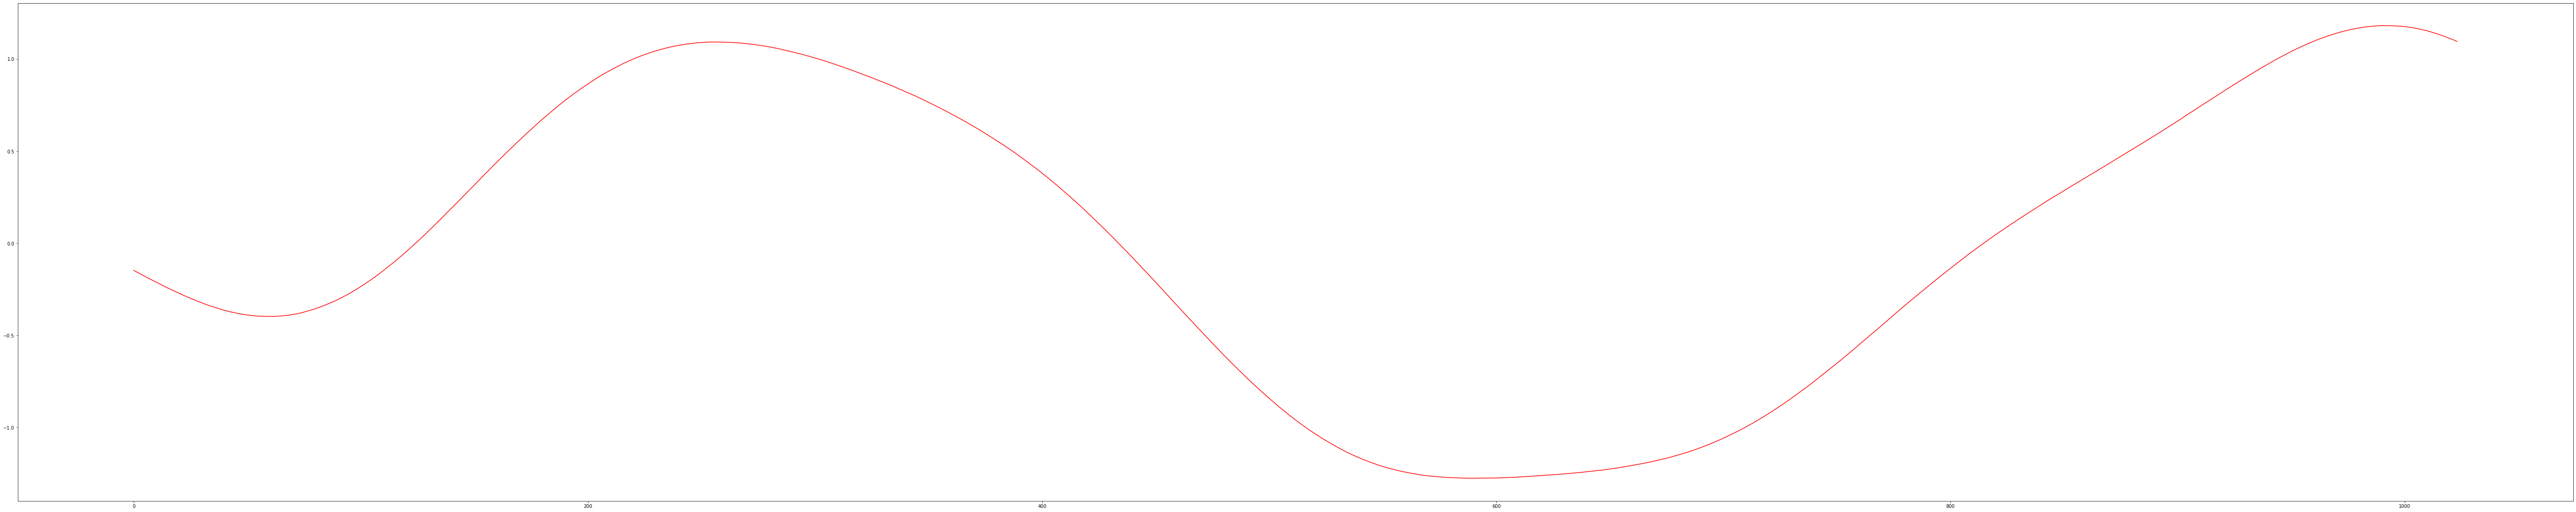

In [173]:
# data, label= iter(train_dl).next()
visualizeTimeseriesSensorData(train_data[24050],0,sample_len)

In [60]:
data_dir

'C:\\Users\\Mohamed Ragab\\OneDrive - Nanyang Technological University\\PhD Codes Implementation\\My Proposed Works\\Structural Health Monitring\\data\\data_10s'

In [174]:
dataset_10s ={'train_data':train_data,'train_labels':train_labels, 'test_data':test_data,'test_labels':test_labels}

torch.save(dataset_10s,os.path.join(data_dir,'train_test_dataset_10s.pt'))


In [175]:
train_dl = DataLoader(MyDataset(train_data, train_labels), batch_size=256, shuffle=True, drop_last=False)
test_dl = DataLoader(MyDataset(test_data, test_labels), batch_size=256, shuffle=False, drop_last=False)

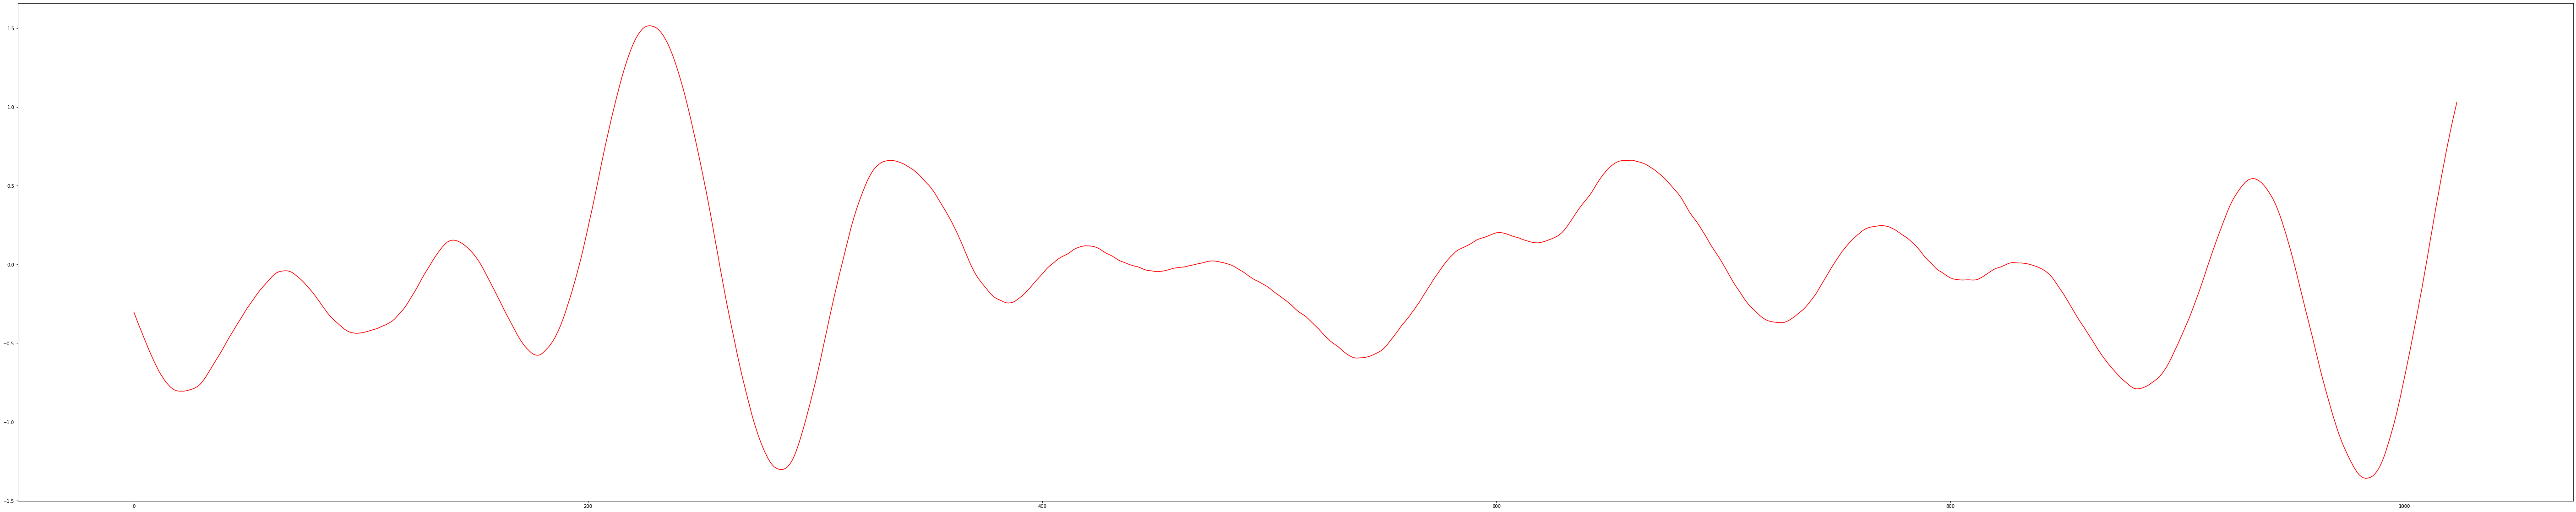

In [176]:
data, label= iter(train_dl).next()
# Visualize the timeseries data
visualizeTimeseriesSensorData(data[9],0,sample_len)

In [215]:
data, label= iter(train_dl).next()
label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])